In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [23]:
import pandas as pd
from examples.boltzman_money import MoneyModel
from examples.mating import MatingModel

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [4]:
mm = MoneyModel(10, 10, 5)
for i in range(100):
    mm.step()

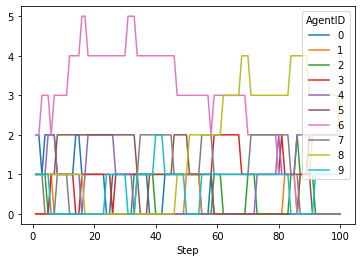

In [5]:
df = (mm
      .datacollector
      .get_agent_vars_dataframe()
      ["Wealth"]
      .unstack("AgentID")
      )
df.plot();

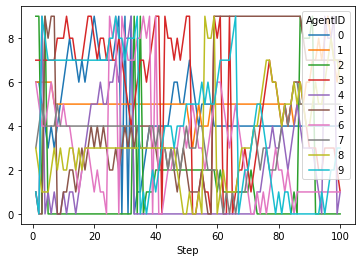

In [6]:
df = (mm
      .datacollector
      .get_agent_vars_dataframe()
      ['Pos']
      .apply(lambda x: pd.Series({'x': x[0], 'y': x[1]}))
      )
df['x'].unstack("AgentID").plot();

---

In [80]:
mm = MatingModel(10, .5, 20, 20)
for i in range(10000):
    mm.step()

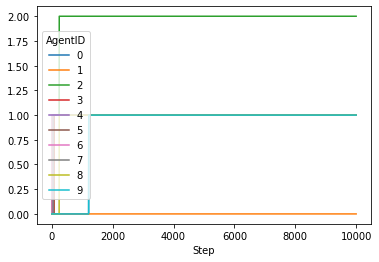

In [81]:
df = (mm.datacollector.get_agent_vars_dataframe())
df["Pairs"].unstack().applymap(len).plot();

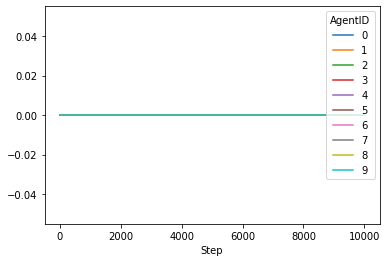

In [82]:
df["Separations"].unstack().applymap(len).plot();

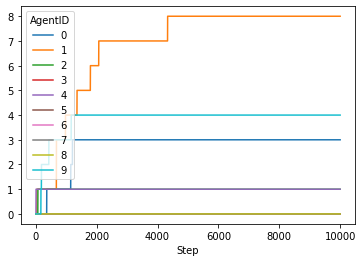

In [83]:
df["Rejections"].unstack().applymap(len).plot();

# Batch run

In [4]:
from mesa.batchrunner import batch_run
import numpy as np

768it [16:08,  1.26s/it]


In [30]:
model_params_s = {
    "height": 20,
    "width": 10,
    "it_M": 0.3,
    "it_F": 0.5,
    "num_agents": range(40, 81, 20),
    "balance": 0.5
}

results_s = batch_run(
    MatingModel,
    parameters=model_params_s,
    iterations=20,
    max_steps=1000,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

1200it [1:06:16,  3.31s/it]


In [31]:
len(results_s)

1201200

In [36]:
df_s = pd.DataFrame(results_s)
df_s.head()

,RunId,iteration,Step,height,width,it_M,it_F,num_agents,balance,Incel_M,Incel_F,Incel,Single_M,Single_F,Single,Avg_rej_M,Avg_rej_F,Avg_rej
0,0,-1,0,20,10,0.3,0.5,40,0.5,0.0,0.0,0.0,1.00,1.00,1.00,0.000000,0.0,0.000000
1,0,-1,1,20,10,0.3,0.5,40,0.5,0.0,0.0,0.0,1.00,1.00,1.00,0.050000,0.0,0.025000
2,0,-1,2,20,10,0.3,0.5,40,0.5,0.0,0.0,0.0,0.95,0.95,0.95,0.052632,0.0,0.026316
3,0,-1,3,20,10,0.3,0.5,40,0.5,0.0,0.0,0.0,0.95,0.95,0.95,0.052632,0.0,0.026316
4,0,-1,4,20,10,0.3,0.5,40,0.5,0.0,0.0,0.0,0.95,0.95,0.95,0.052632,0.0,0.026316


In [37]:
df_s.to_csv("single_run_20-iters.csv")

In [38]:
parameters = [*model_params_s.keys(), "iteration"]
plot_df_s = df_s.groupby(parameters).agg({"Incel_M": max, "Incel_F": max}).reset_index().drop("iteration", axis=1)

<AxesSubplot:xlabel='Incel_M', ylabel='Incel_F'>

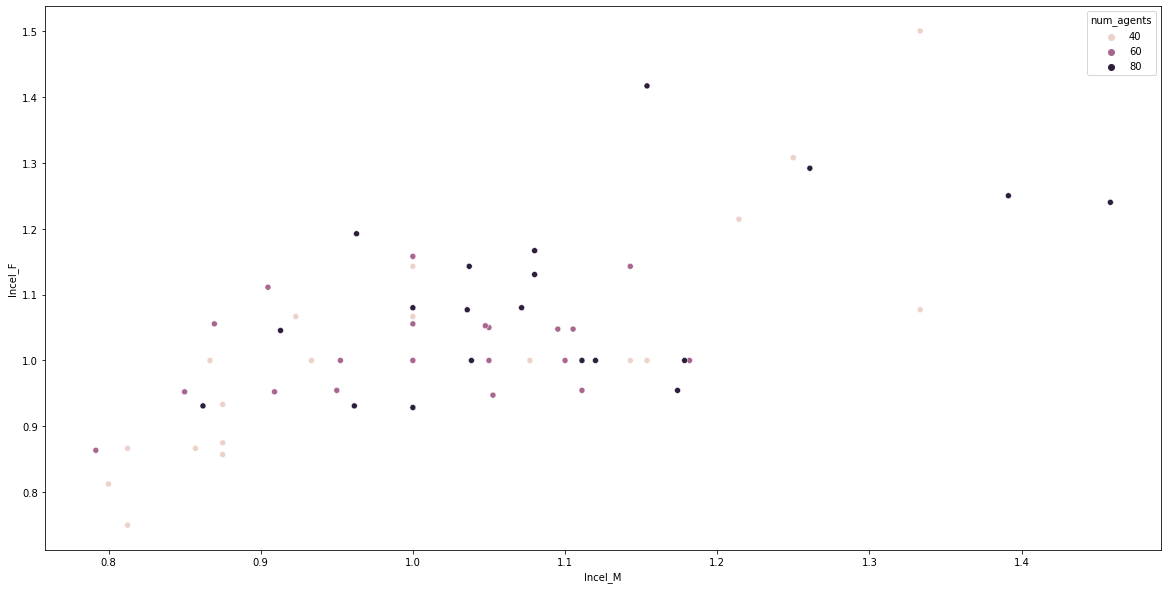

In [41]:
sns.scatterplot(data=plot_df_s, x="Incel_M", y="Incel_F", hue="num_agents")

---

In [ ]:
model_params = {
    "height": 20,
    "width": 10,
    "it_M": np.linspace(0.2, 0.8, 4),
    "it_F": np.linspace(0.5,1.3, 4),
    "num_agents": range(40, 80, 20),
    "balance": np.linspace(.2, .8, 6),
}

results = batch_run(
    MatingModel,
    parameters=model_params,
    iterations=2,
    max_steps=500,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

In [7]:
df = pd.DataFrame(results)
df.head()

,RunId,iteration,Step,height,width,it_M,it_F,num_agents,balance,Incel_M,Incel_F,Incel,Single_M,Single_F,Single,Avg_rej_M,Avg_rej_F,Avg_rej
0,0,-1,0,20,10,0.2,0.5,40,0.2,0.0,0.0,0.0,1.0,1.0,1.0,0.500,0.0,0.100
1,0,-1,1,20,10,0.2,0.5,40,0.2,0.0,0.0,0.0,1.0,1.0,1.0,0.500,0.0,0.100
2,0,-1,2,20,10,0.2,0.5,40,0.2,0.0,0.0,0.0,1.0,1.0,1.0,0.625,0.0,0.125
3,0,-1,3,20,10,0.2,0.5,40,0.2,0.0,0.0,0.0,1.0,1.0,1.0,1.000,0.0,0.200
4,0,-1,4,20,10,0.2,0.5,40,0.2,0.0,0.0,0.0,1.0,1.0,1.0,1.000,0.0,0.200


In [28]:
plot_df = df.groupby(parameters).agg({"Incel_M": max, "Incel_F": max}).reset_index().drop("iteration", axis=1)

<AxesSubplot:xlabel='Incel_M', ylabel='Incel_F'>

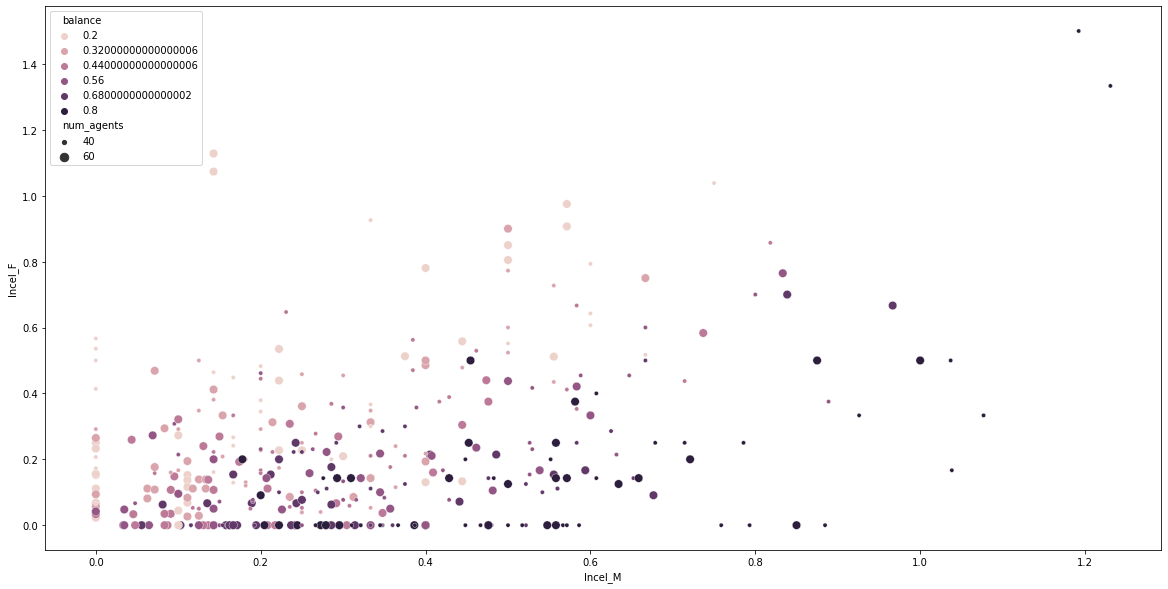

In [29]:
import seaborn as sns
sns.scatterplot(data=plot_df, x="Incel_M", y="Incel_F", size="num_agents", hue="balance")